# Linear Regression with Tensorflow

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
INFO:tensorflow:Disabling eager execution
INFO:tensorflow:Disabling v2 tensorshape
Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Disabling resource variables
INFO:tensorflow:Disabling tensor equality
INFO:tensorflow:Disabling control flow v2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Data preparation

In [3]:
x_train = [1, 2, 3]

In [4]:
y_train = [2+1 +0.1, 4+1 -0.2, 6+1 +0.15] # adjust the noises !

Text(0, 0.5, 'Y')

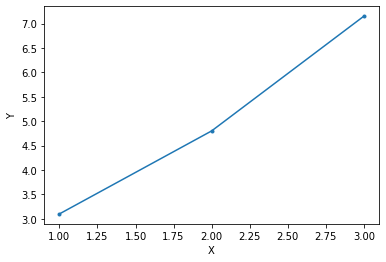

In [5]:
plt.plot(x_train, y_train,'.-')
plt.xlabel('X')
plt.ylabel('Y')

$$ y = 2x +1$$

$$ y = wx + b $$

### Initialization  (초기화)

In [6]:
w0 = 7; #바꾸어보세요
b0 = -10; #바꾸어보세요

In [7]:
W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

### Our hypothesis XW+b

In [8]:
hypothesis = x_train * W + b

### Cost function

In [9]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) #MSE, Mean squared error

### Optimizer 설정

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

### Launch the graph in a session & Initializes global variables in the graph

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

### Train the model !

In [12]:
nb_epoch = 2000

In [13]:
vw = [] # empty list
vb = [] 
vcost = []

In [14]:
for step in range(nb_epoch+1):
    sess.run(train)

    w1 = sess.run(W)[0] # slope
    b1 = sess.run(b)[0] # bias
    cost1 = sess.run(cost)
    
    vw.append(w1)
    vb.append(b1)
    vcost.append(cost1)
    
    if step % 100 == 0: # 100번마다 결과 출력해보기 (안해도 되지만..)
        print(step, '--', cost1, '--',  w1, '--', b1)

0 -- 17.451681 -- 6.9743333 -- -9.979667
100 -- 10.741469 -- 5.8273573 -- -7.6769824
200 -- 6.646544 -- 5.0139985 -- -5.828029
300 -- 4.1161275 -- 4.3746243 -- -4.3745832
400 -- 2.5524843 -- 3.872019 -- -3.2320423
500 -- 1.5862471 -- 3.4769251 -- -2.3339
600 -- 0.98917204 -- 3.1663456 -- -1.6278794
700 -- 0.6202162 -- 2.9222016 -- -1.072883
800 -- 0.3922235 -- 2.730282 -- -0.6366049
900 -- 0.25133798 -- 2.5794156 -- -0.29365066
1000 -- 0.16427936 -- 2.4608212 -- -0.024057537
1100 -- 0.110482454 -- 2.3675952 -- 0.18786731
1200 -- 0.07723926 -- 2.294311 -- 0.3544593
1300 -- 0.056697045 -- 2.2367034 -- 0.4854154
1400 -- 0.04400317 -- 2.1914184 -- 0.588359
1500 -- 0.03615908 -- 2.1558201 -- 0.6692825
1600 -- 0.03131194 -- 2.1278367 -- 0.73289526
1700 -- 0.028316705 -- 2.1058393 -- 0.7829006
1800 -- 0.026465824 -- 2.0885472 -- 0.8222094
1900 -- 0.025322085 -- 2.0749538 -- 0.85311013
2000 -- 0.02461528 -- 2.0642674 -- 0.87740105


In [15]:
w1 = sess.run(W)[0] # slope
b1 = sess.run(b)[0] # bias
str1 = 'y={:.3}x + {:.3}'.format(w1, b1)
print(w1, b1)
print(str1)

2.0642674 0.87740105
y=2.06x + 0.877


Text(0.5, 1.0, 'y=2.06x + 0.877')

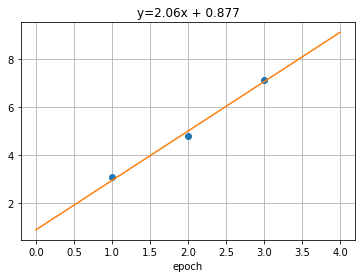

In [16]:
plt.figure(1)
plt.plot(x_train, y_train,'o')

x1 = np.min(x_train)-1, np.max(x_train)+1
y1 = np.dot(w1,x1) + b1
plt.plot(x1, y1)
plt.grid()
plt.xlabel('epoch')
plt.title(str1)

Text(0, 0.5, 'w')

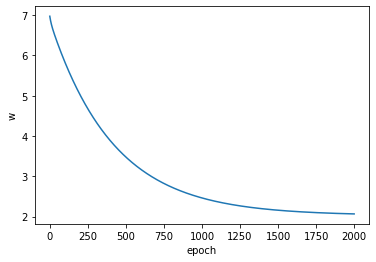

In [17]:
plt.plot(vw)
plt.xlabel('epoch')
plt.ylabel('w')

Text(0, 0.5, 'b, bias')

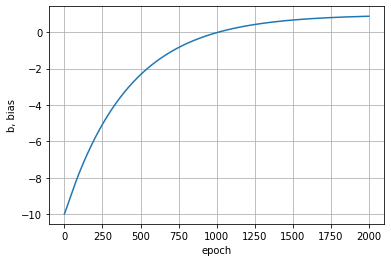

In [18]:
plt.plot(vb)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('b, bias')

Text(0, 0.5, 'loss (MSE)')

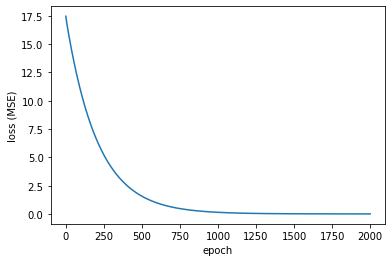

In [19]:
plt.plot(vcost)
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')